In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [4]:
df=pd.read_csv("2021_Cities_Water_Security_Risks.csv")
print("Dimension of data frame:", df.shape)
df.head(20)

Dimension of data frame: (2349, 15)


,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
0,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Serious,NaN,The city depends on one river for water supply...
1,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,NaN,The water cost burden is felt across all ZIP c...
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...
3,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Current,Serious,Medium-high,The downscaling of the climate projections at ...
4,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Declining water quality,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...
5,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,3,Severe weather events,Current,Serious,Medium-high,"In terms of water supply, rivers floods could ..."
6,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Increased water scarcity,Current,Serious,Medium-high,Climate Plan vulnerability assessement showed ...
7,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,5,Increased water demand,Current,Less Serious,Medium-low,Climate Plan vulnerability assessement showed ...
8,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,6,Drought,Current,Serious,Medium-high,The city currently has a deficit in its water ...
9,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,7,Higher water prices,Current,Serious,Medium-high,Barcelona’s adhesion to the Blue Communities n...


In [5]:
#view more columns
pd.set_option('display.max_columns', 100)

In [118]:
df.dtypes

Questionnaire Name                         object
Account Number                              int64
Account Name                               object
Country                                    object
CDP Region                                 object
ParentSection                              object
Section                                    object
Question Number                            object
Question Name                              object
Row Number                                  int64
Water security risk drivers                object
Anticipated timescale                      object
Estimated magnitude of potential impact    object
Estimated probability of impact            object
Risk description                           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Questionnaire Name                       2349 non-null   object
 1   Account Number                           2349 non-null   int64 
 2   Account Name                             2349 non-null   object
 3   Country                                  2349 non-null   object
 4   CDP Region                               2349 non-null   object
 5   ParentSection                            2349 non-null   object
 6   Section                                  2349 non-null   object
 7   Question Number                          2349 non-null   object
 8   Question Name                            2349 non-null   object
 9   Row Number                               2349 non-null   int64 
 10  Water security risk drivers              2137 non-null   obj

In [128]:
#check for missing and categorical values
for i in list(df.columns):
    print(f'{i} {sum(df[i].isnull())} nulls and {df[i].nunique()} unique values ')

Questionnaire Name 0 nulls and 1 unique values 
Account Number 0 nulls and 1070 unique values 
Account Name 0 nulls and 1070 unique values 
Country 0 nulls and 93 unique values 
CDP Region 0 nulls and 8 unique values 
ParentSection 0 nulls and 1 unique values 
Section 0 nulls and 1 unique values 
Question Number 0 nulls and 1 unique values 
Question Name 0 nulls and 1 unique values 
Row Number 0 nulls and 161 unique values 
Water security risk drivers 212 nulls and 64 unique values 
Anticipated timescale 197 nulls and 5 unique values 
Estimated magnitude of potential impact 261 nulls and 4 unique values 
Estimated probability of impact 594 nulls and 7 unique values 
Risk description 405 nulls and 1368 unique values 


## Heatmap of missing values

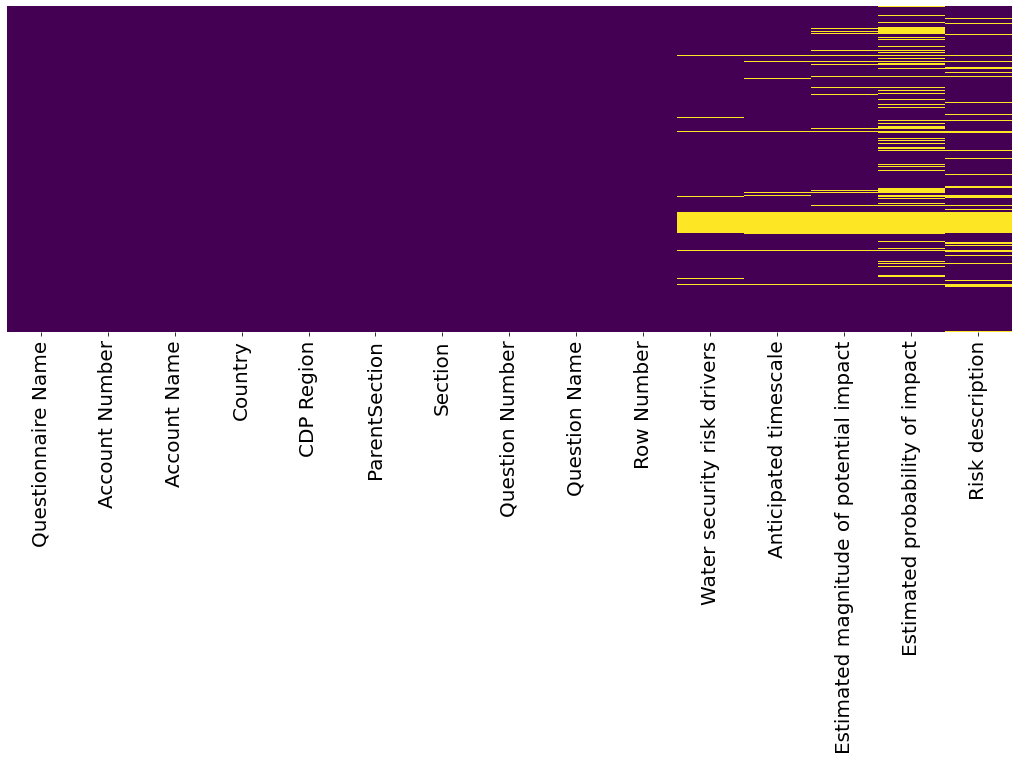

In [7]:
plt.figure(figsize = (18, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#plt.xlabel(xlabel = 'CDP Region', fontsize = 20)
#plt.ylabel(ylabel = 'Value', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.xticks(rotation=90)
#plt.legend(loc = 'best', fontsize = 20)

<AxesSubplot:xlabel='Country', ylabel='count'>

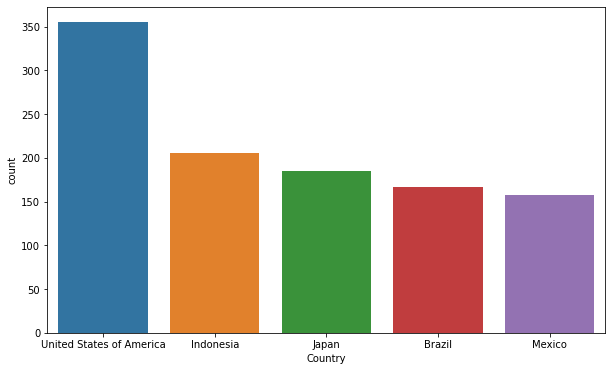

In [8]:
# Top 5 countries with most entries
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Country', data = df, order = df['Country'].value_counts().head().index)

<AxesSubplot:xlabel='Account Name', ylabel='count'>

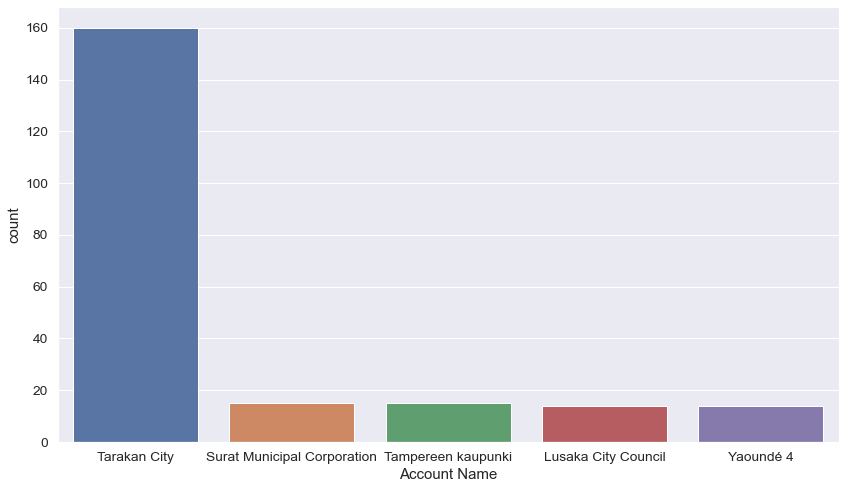

In [134]:
# Top 5 cities with most entries
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Account Name', data = df, order = df['Account Name'].value_counts().head().index)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Southeast Asia and Oceania'),
  Text(3, 0, 'East Asia'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Latin America'),
  Text(6, 0, 'South and West Asia'),
  Text(7, 0, 'Middle East')])

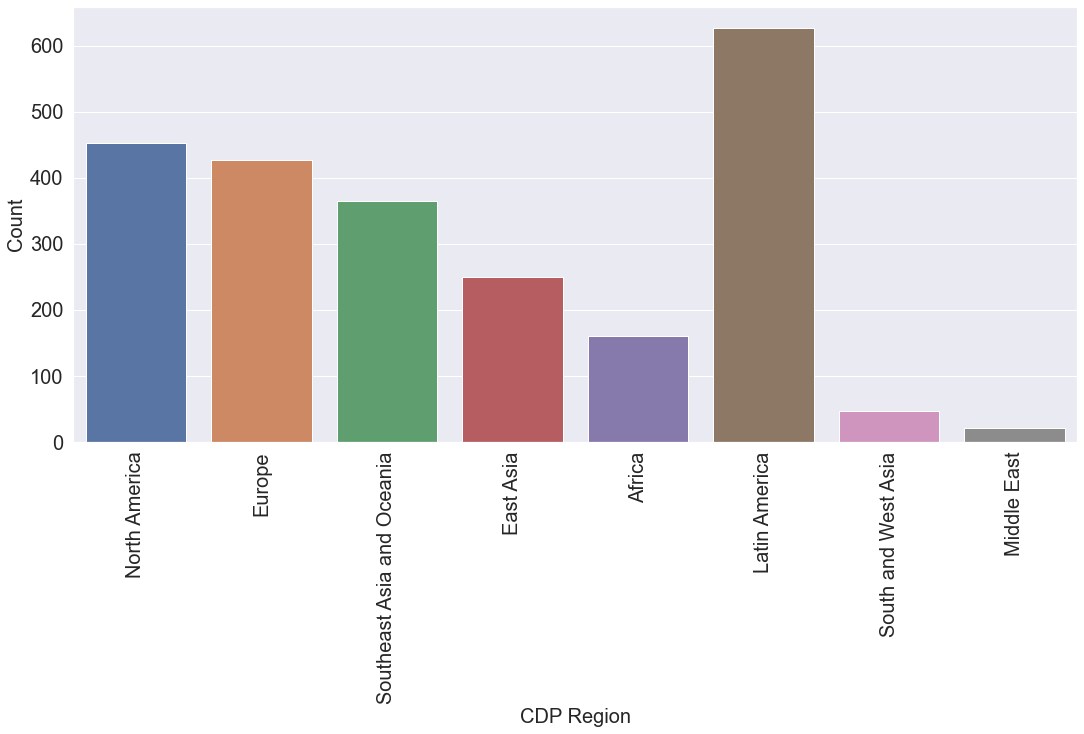

In [24]:
#countplot based on regions
sns.set(font_scale = 1.25)
plt.figure(figsize = (18, 8))
regions = sns.countplot(x = 'CDP Region', data = df)
plt.xlabel(xlabel = 'CDP Region', fontsize = 20)
plt.ylabel(ylabel = 'Count', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)
#plt.legend(fontsize = 15)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'North America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Southeast Asia and Oceania'),
  Text(3, 0, 'East Asia'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Latin America'),
  Text(6, 0, 'South and West Asia'),
  Text(7, 0, 'Middle East')])

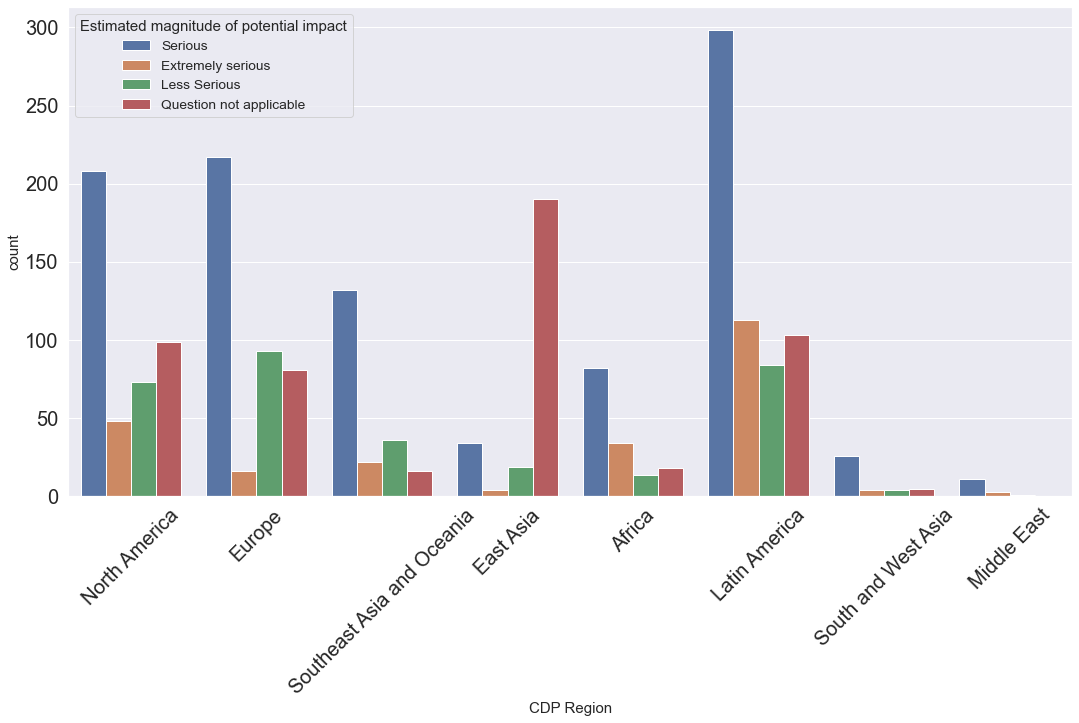

In [10]:
#countplot based on regions with hue Estimated magnitude of potential impact
plt.figure(figsize = (18, 9))
plt.legend(loc="upper right", frameon=True, fontsize=20)
ax = sns.countplot(x = 'CDP Region', data = df, hue = 'Estimated magnitude of potential impact')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='CDP Region', ylabel='count'>

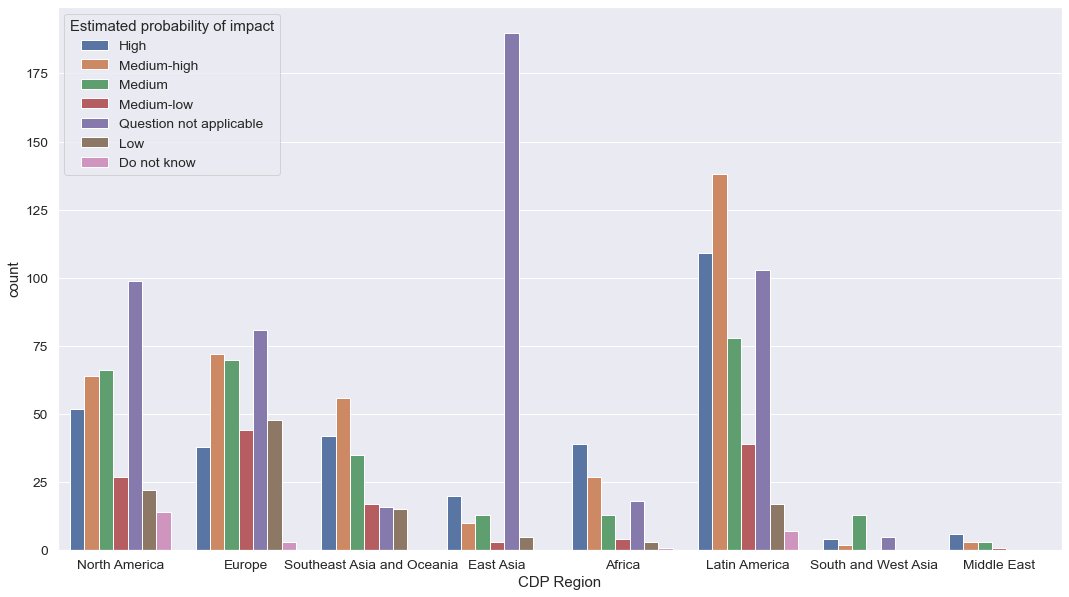

In [137]:
#countplot based on regions with hue Estimated probability of impact
plt.figure(figsize = (18, 10))
sns.countplot(x = 'CDP Region', data = df,
              hue = 'Estimated probability of impact')

<AxesSubplot:xlabel='CDP Region', ylabel='count'>

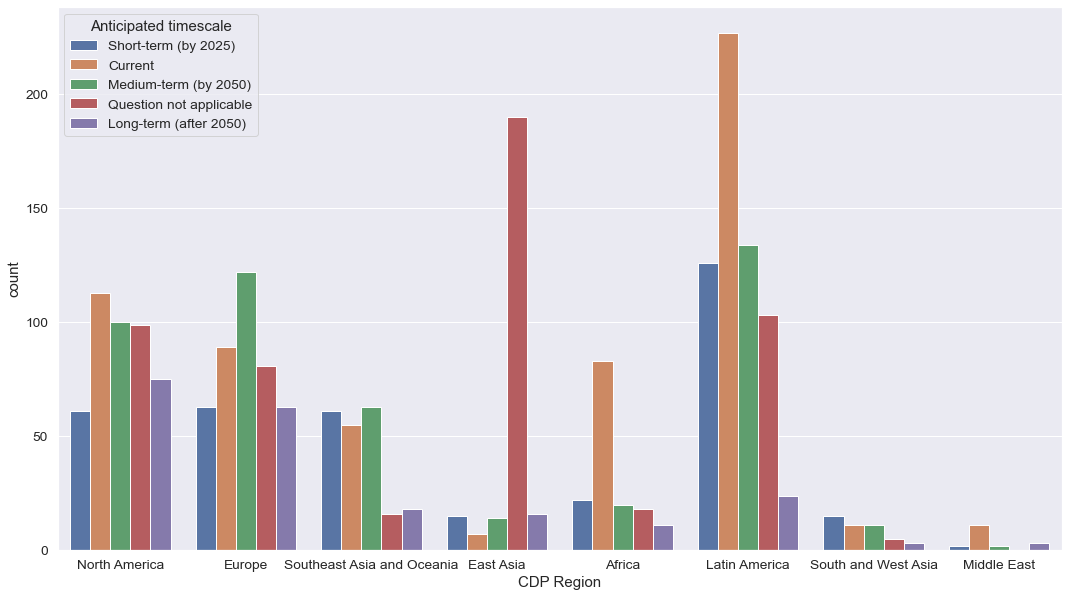

In [11]:
#countplot based on regions with hue Anticipated timescale
plt.figure(figsize = (18, 10))
sns.countplot(x = 'CDP Region', data = df,
              hue = 'Anticipated timescale')

## Get fractional value for each cdp region
Here, for each region, we try to get the fraction of categories in the categorical variables 'Estimated magnitude of potential impact', 'Estimated probability of impact' and 'Anticipated timescale'

In [12]:
def percent_frac(x): #x = estimated_prob/etc
    
    
    data = pd.read_csv("2021_Cities_Water_Security_Risks.csv")
    
    data_1 = data[['CDP Region', x]].dropna()
    
    # remove rows with question not available
    
    new_data = data_1[data_1[x] != 'Question not applicable']
    
    locations = list(new_data['CDP Region'].unique())
    severities = list(new_data[x].dropna().unique())
    
        
    # now get percentage
    length = []
    percent_frac = []
    for i in locations:
        data_frame = new_data[new_data['CDP Region'] == i]
        size = len(data_frame)
        length.append(size)
        for j in severities:
            new_df = data_frame[data_frame[x] == j]
            percent_frac.append(len(new_df)/size)
    new_per = np.array(percent_frac).reshape(len(locations), len(severities))
    
    
    #how many columns? no of unicities
    
    no_columns = len(severities)
    
    new_df = pd.DataFrame(data = new_per, columns = severities)
    new_df['CDP Region'] = locations
    
    new_pd = pd.melt(new_df, id_vars='CDP Region',
        value_vars=list(new_data[x].dropna().unique()))
    new_pd.rename(columns = {'variable':x}, inplace = True)        
        
    return new_pd
    
    # length of each data

In [13]:
prob_impact = percent_frac('Estimated probability of impact')
mag_impact = percent_frac('Estimated magnitude of potential impact')
time_scale = percent_frac('Anticipated timescale') #x = estimated_prob/etc

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

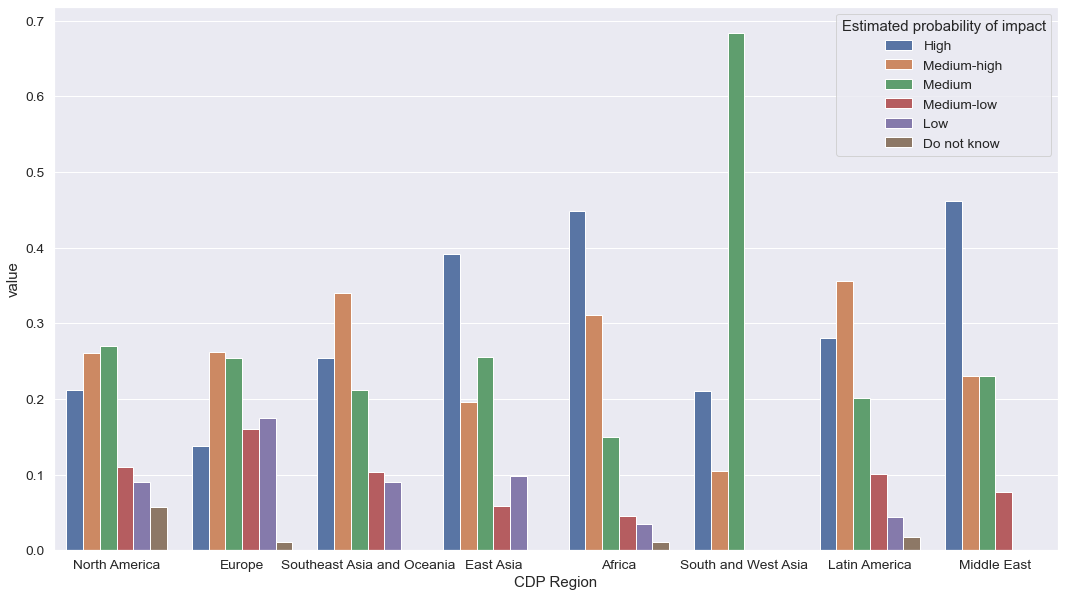

In [14]:
plt.figure(figsize = (18, 10))
sns.barplot(data = prob_impact, x = 'CDP Region', y = 'value', hue = 'Estimated probability of impact')

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

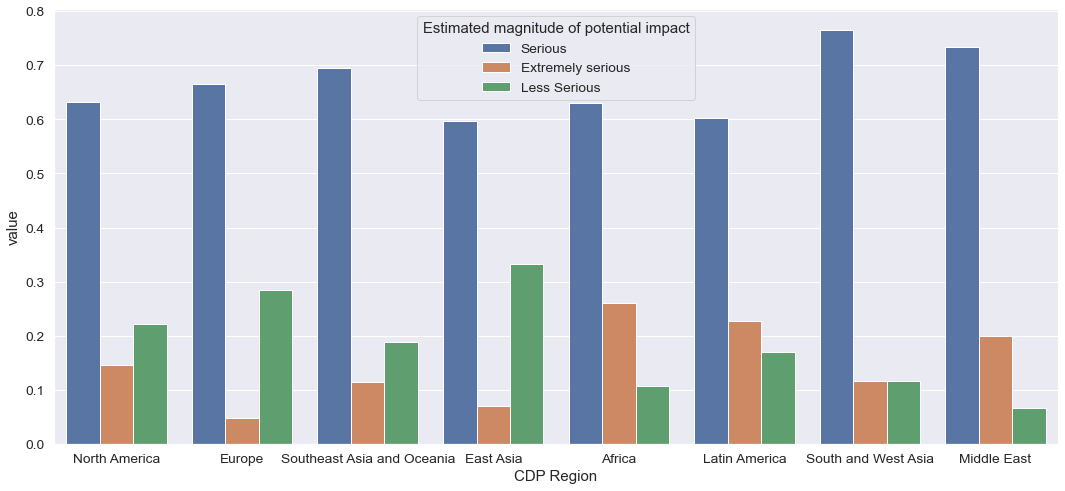

In [22]:
plt.figure(figsize = (18, 8))
sns.barplot(data = mag_impact, x = 'CDP Region', y = 'value', hue = 'Estimated magnitude of potential impact')

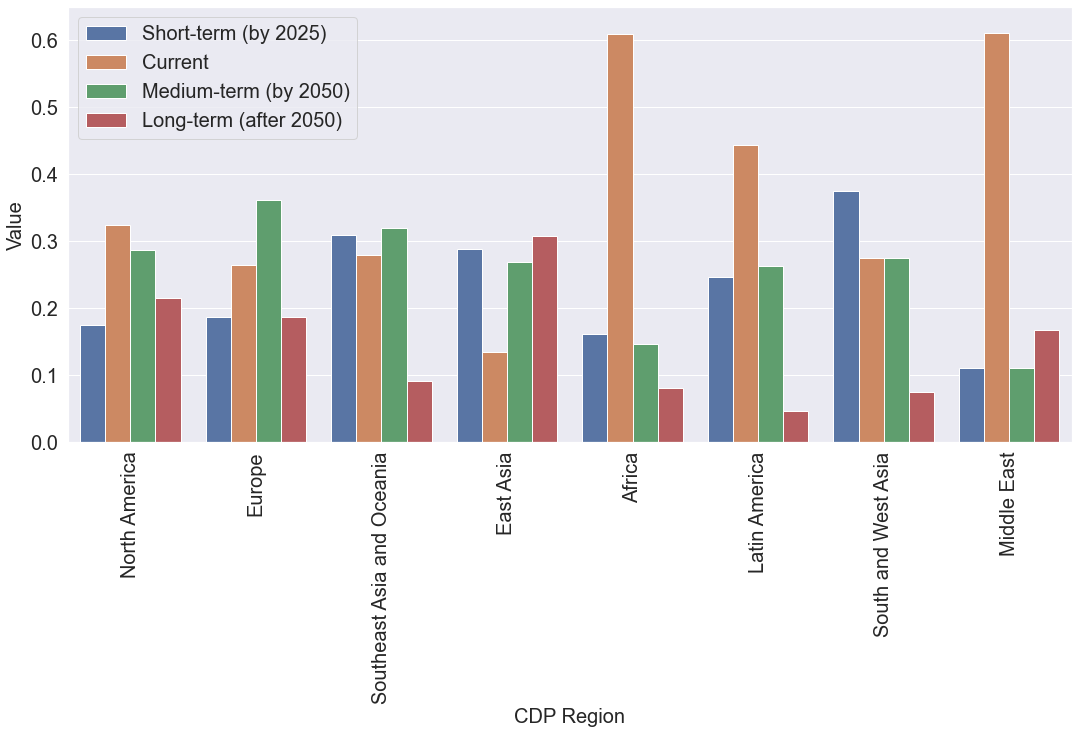

In [23]:
plt.figure(figsize = (18, 8))
sns.barplot(data = time_scale, x = 'CDP Region', y = 'value', hue = 'Anticipated timescale')
plt.xlabel(xlabel = 'CDP Region', fontsize = 20)
plt.ylabel(ylabel = 'Value', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)
plt.ylim([0, 0.65])
plt.legend(fontsize = 20)

## Fracton value of not reported 


In [157]:
# check fraction of missing data for each region

def miss_fraction(x):
    df = x[['Account Number', 'CDP Region','Water security risk drivers',
       'Anticipated timescale', 'Estimated magnitude of potential impact',
       'Estimated probability of impact', 'Risk description']]
    columns = ['Water security risk drivers',
       'Anticipated timescale', 'Estimated magnitude of potential impact',
       'Estimated probability of impact', 'Risk description']
    
    location = list(df['CDP Region'].unique())
    
    length = []
    percent_frac = []
    
    for i in location:
        data_frame = df[df['CDP Region'] == i]
        size = len(data_frame)
        length.append(size)
        for j in columns:
            value = sum(data_frame[j].isna())
            percent_frac.append(value/size)
    new_per = np.array(percent_frac).reshape(len(location), len(columns))
    
    #how many columns? no of unicities
    
    no_columns = len(columns)
    
    new_df = pd.DataFrame(data = new_per, columns = columns)
    new_df['CDP Region'] = location
    
    new_pd = pd.melt(new_df, id_vars='CDP Region',
        value_vars=columns)
    new_pd.rename(columns = {'variable':'description'}, inplace = True)
    
    return new_pd
            
    

In [158]:
missing = miss_fraction(df)

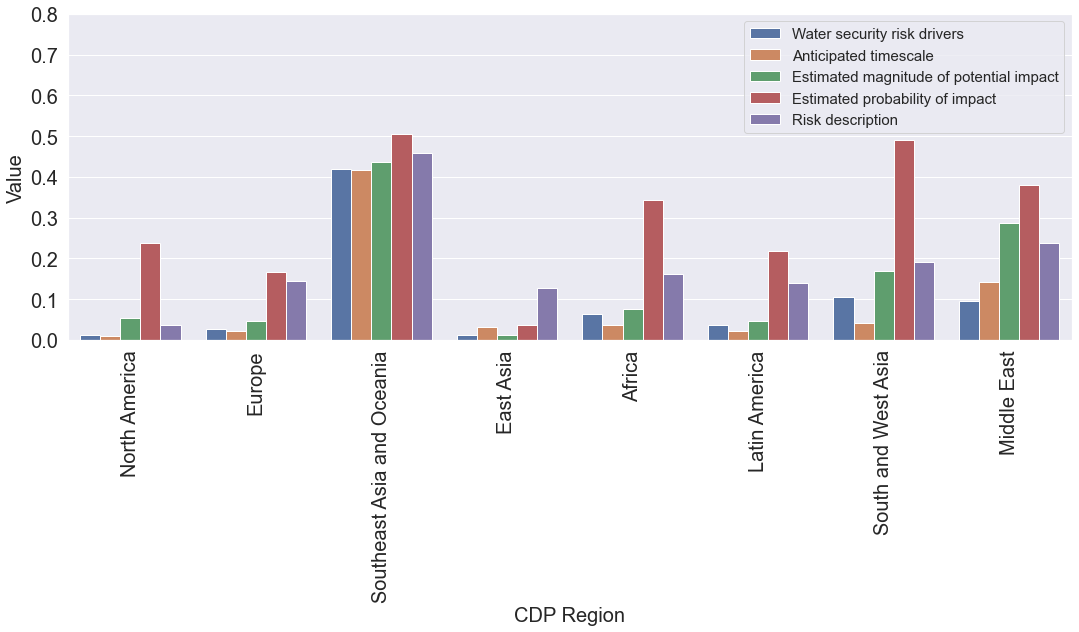

In [182]:
plt.figure(figsize = (18, 6))
#plt.legend(loc="best", frameon=True, fontsize=20)
sns.barplot(data = missing, x = 'CDP Region', y = 'value', hue = 'description')
plt.xlabel(xlabel = 'CDP Region', fontsize = 20)
plt.ylabel(ylabel = 'Value', fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(rotation=90)
plt.ylim([0, 0.8])
plt.legend(fontsize = 15)

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

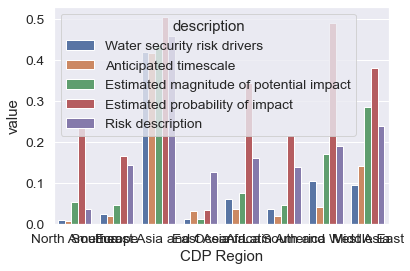

In [175]:
sns.barplot(x="CDP Region", y="value", hue = 'description', data=missing)

In [96]:
dfs = df[df['CDP Region'] == 'South and West Asia']

In [102]:
new_pd = pd.melt(missing, id_vars='CDP Region',
        value_vars=['Water security risk drivers',
       'Anticipated timescale', 'Estimated magnitude of potential impact',
       'Estimated probability of impact', 'Risk description'])

In [105]:
new_pd

,CDP Region,variable,value
0,North America,Water security risk drivers,0.011062
1,Europe,Water security risk drivers,0.025761
2,Southeast Asia and Oceania,Water security risk drivers,0.419178
3,East Asia,Water security risk drivers,0.012000
4,Africa,Water security risk drivers,0.062500
5,Latin America,Water security risk drivers,0.036683
6,South and West Asia,Water security risk drivers,0.106383
7,Middle East,Water security risk drivers,0.095238
8,North America,Anticipated timescale,0.008850
9,Europe,Anticipated timescale,0.021077


In [28]:
prob_impact = percent_frac('Estimated probability of impact')
mag_impact = percent_frac('Estimated magnitude of potential impact')
time_scale = percent_frac('Anticipated timescale') #x = estimated_prob/etc

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

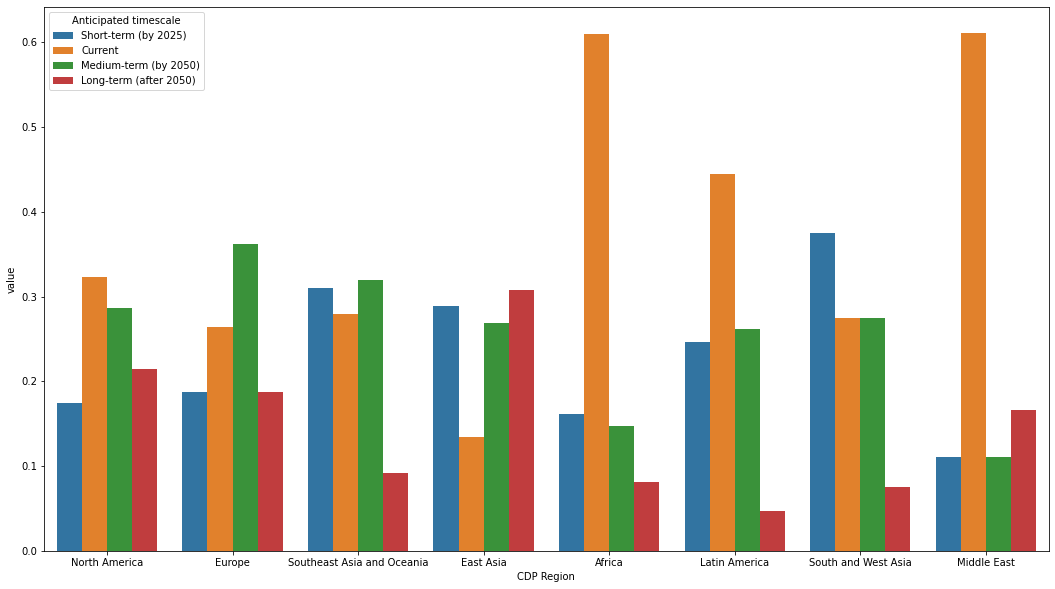

In [75]:
plt.figure(figsize = (18, 10))
sns.barplot(data = time_scale, x = 'CDP Region', y = 'value', hue = 'Anticipated timescale')

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

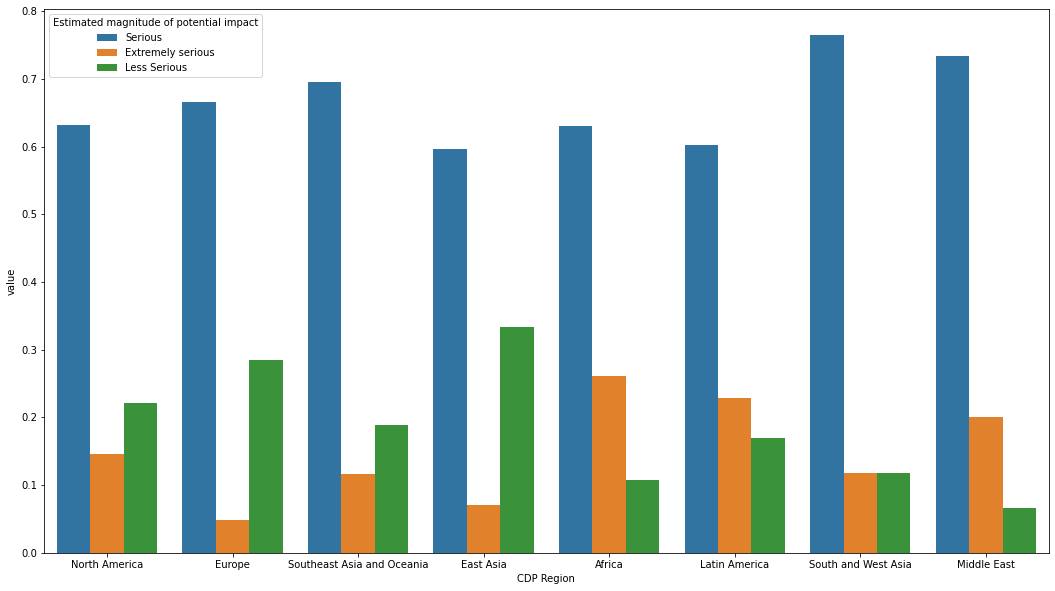

In [30]:
plt.figure(figsize = (18, 10))
sns.barplot(data = mag_impact, x = 'CDP Region', y = 'value', hue = 'Estimated magnitude of potential impact')

<AxesSubplot:xlabel='CDP Region', ylabel='value'>

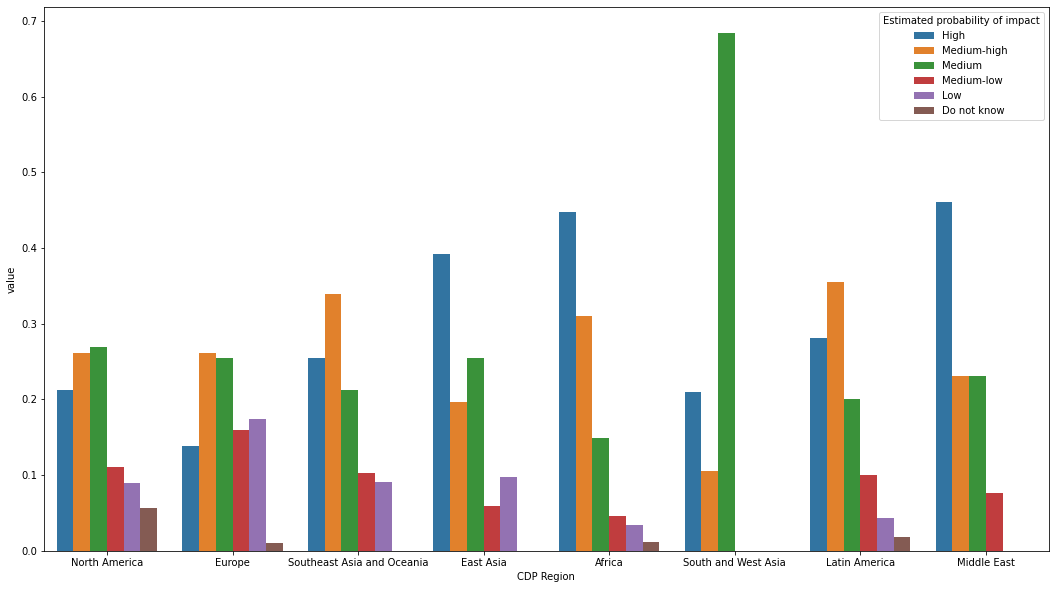

In [31]:
plt.figure(figsize = (18, 10))
sns.barplot(data = prob_impact, x = 'CDP Region', y = 'value', hue = 'Estimated probability of impact')

In [13]:
pop_data = pd.read_csv('2021_City-wide_Emissions.csv')


In [14]:
to_concat = pop_data[['Account Number','Land area (in square km)', 'Population']]

In [15]:
concated_data = pd.merge(df, to_concat, left_on = 'Account Number', right_on = 'Account Number', how = 'left')

concated_data.head()

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description,Land area (in square km),Population
0,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Serious,NaN,The city depends on one river for water supply...,347.00,506811.0
1,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,NaN,The water cost burden is felt across all ZIP c...,347.00,506811.0
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...,845.70,995484.0
3,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Current,Serious,Medium-high,The downscaling of the climate projections at ...,102.15,1664182.0
4,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Declining water quality,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...,102.15,1664182.0


In [16]:
concated_data['Population Density'] = round(concated_data['Population']/concated_data['Land area (in square km)'])

In [115]:
concated_data.head()

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description,Land area (in square km),Population,Population Density
0,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Serious,NaN,The city depends on one river for water supply...,347.00,506811.0,1461.0
1,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,NaN,The water cost burden is felt across all ZIP c...,347.00,506811.0,1461.0
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...,845.70,995484.0,1177.0
3,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Current,Serious,Medium-high,The downscaling of the climate projections at ...,102.15,1664182.0,16292.0
4,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Declining water quality,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...,102.15,1664182.0,16292.0


In [116]:
concated_data[concated_data['Account Name'] == "Tarakan City"]

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description,Land area (in square km),Population,Population Density
1470,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Drought,Short-term (by 2025),Serious,Medium-high,"forest fire, water scarcity, drought",250.8,245784.0,980.0
1471,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Increased water demand,Current,Serious,Medium-high,service not maximum,250.8,245784.0,980.0
1472,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,3,Declining water quality,Current,Serious,Medium,affect to community health,250.8,245784.0,980.0
1473,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Inadequate or ageing water supply infrastructure,Short-term (by 2025),Serious,High,increasing NRW (non revenue water),250.8,245784.0,980.0
1474,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,5,Higher water prices,Short-term (by 2025),Serious,High,operational cost is high,250.8,245784.0,980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,156,NaN,NaN,NaN,NaN,NaN,250.8,245784.0,980.0
1626,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,157,NaN,NaN,NaN,NaN,NaN,250.8,245784.0,980.0
1627,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,158,NaN,NaN,NaN,NaN,NaN,250.8,245784.0,980.0
1628,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,159,NaN,NaN,NaN,NaN,NaN,250.8,245784.0,980.0


In [117]:
full_data = pd.read_csv('2021_Full_Cities_Dataset.csv')

In [118]:
full_data.head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,Cities 2021,2021,841964,"City of Hallandale Beach, FL",United States of America,United States of America,2. Climate Hazards and Vulnerability,Climate Hazards,2.1,Please list the most significant climate hazar...,6,Most relevant assets / services affected overall,4,NaN,Public health,NaN,NaN,05/06/2022 05:42:33 AM
1,Cities 2021,2021,54652,Prefeitura de Osasco,Brazil,Latin America,2. Climate Hazards and Vulnerability,Climate Hazards,2.2,Please identify and describe the factors that ...,1,Factors that affect ability to adapt,3,NaN,Access to education,NaN,NaN,05/06/2022 05:42:33 AM
2,Cities 2021,2021,859188,Kirishima City,Japan,East Asia,5. Emissions Reduction,Mitigation Actions,5.4,Describe the anticipated outcomes of the most ...,20,Role in the GCC program,14,NaN,Question not applicable,NaN,NaN,05/06/2022 05:42:33 AM
3,Cities 2021,2021,60319,Prefeitura de Pato Branco,Brazil,Latin America,5. Emissions Reduction,Mitigation Target setting,5.0d,Please provide details of your total city-wide...,5,Base year,0,NaN,Question not applicable,NaN,NaN,05/06/2022 05:42:33 AM
4,Cities 2021,2021,54342,Jbail-Byblos Municipality,Lebanon,Middle East,4. City-wide Emissions,City-wide GHG Emissions Data,4.6a,The Global Covenant of Mayors requires committ...,1,Direct emissions (metric tonnes CO2e),30,Total Generation of grid-supplied energy,Question not applicable,NaN,NaN,05/06/2022 05:42:33 AM


In [119]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636446 entries, 0 to 1636445
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Questionnaire         1636446 non-null  object
 1   Year Reported to CDP  1636446 non-null  int64 
 2   Account Number        1636446 non-null  int64 
 3   Organization          1636446 non-null  object
 4   Country               1636446 non-null  object
 5   CDP Region            1569382 non-null  object
 6   Parent Section        1220487 non-null  object
 7   Section               1636446 non-null  object
 8   Question Number       1636446 non-null  object
 9   Question Name         1636446 non-null  object
 10  Column Number         1636446 non-null  int64 
 11  Column Name           1590891 non-null  object
 12  Row Number            1636446 non-null  int64 
 13  Row Name              788170 non-null   object
 14  Response Answer       1300967 non-null  object
 15

In [120]:
#check for missing and categorical values
for i in list(full_data.columns):
    print(f'{i} {sum(full_data[i].isnull())} nulls and {full_data[i].nunique()} unique values ')


Questionnaire 0 nulls and 1 unique values 
Year Reported to CDP 0 nulls and 1 unique values 
Account Number 0 nulls and 1070 unique values 
Organization 0 nulls and 1070 unique values 
Country 0 nulls and 93 unique values 
CDP Region 67064 nulls and 9 unique values 
Parent Section 415959 nulls and 9 unique values 
Section 0 nulls and 32 unique values 
Question Number 0 nulls and 150 unique values 
Question Name 0 nulls and 150 unique values 
Column Number 0 nulls and 24 unique values 
Column Name 45555 nulls and 375 unique values 
Row Number 0 nulls and 168 unique values 
Row Name 848276 nulls and 169 unique values 
Response Answer 335479 nulls and 115289 unique values 
Comments 1607593 nulls and 1712 unique values 
File Name 1632934 nulls and 2960 unique values 
Last update 0 nulls and 1 unique values 


In [125]:
full_data[full_data['Section'] == 'Water Supply Management']

City-wide GHG Emissions Data                      346427
10. Transport                                     186661
Mitigation Actions                                179008
Climate Hazards                                   122794
Mitigation Target setting                         105012
8. Energy                                         100636
Adaptation Actions                                 96019
12. Food                                           59048
GCoM Emission Factor and Activity Data             46108
Finance and Economic Opportunities                 39737
13. Waste                                          37450
Local Government Operations GHG Emissions Data     33562
Governance                                         33358
Adaptation Planning                                30876
Adaptation Goals                                   28881
Climate Risk and Vulnerability Assessment          27742
Mitigation Planning                                25891
9. Buildings                   

In [128]:
full_data[full_data['Section'] == 'Adaptation Actions'].head()

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
13,Cities 2021,2021,35885,Tel Aviv-Yafo Municipality,Israel,Middle East,3. Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,12,Total cost provided by the local government (c...,13,NaN,NaN,NaN,NaN,05/06/2022 05:42:33 AM
26,Cities 2021,2021,17411,Southend on Sea Borough Council,United Kingdom of Great Britain and Northern I...,Europe,3. Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,3,Action title,5,NaN,SARCC (Sustainable and resilient coastal cities),NaN,NaN,05/06/2022 05:42:33 AM
29,Cities 2021,2021,841269,Municipalidad de Montecarlo,Argentina,Latin America,3. Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,10,Majority funding source,11,NaN,(Sub)national,NaN,NaN,05/06/2022 05:42:33 AM
71,Cities 2021,2021,73724,Arteaga,Argentina,Latin America,3. Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,6,Co-benefit area,1,NaN,Social community and labour improvements,NaN,NaN,05/06/2022 05:42:33 AM
99,Cities 2021,2021,35475,"City of Calgary, AB",Canada,NaN,3. Adaptation,Adaptation Actions,3.0,Please describe the main actions you are takin...,4,Status of action,6,NaN,Operation,NaN,NaN,05/06/2022 05:42:33 AM


In [132]:
full_data['Column Number'].unique()

array([ 6,  1, 20,  5,  4,  2,  9, 15,  0, 12,  7, 10,  3, 13, 23,  8, 16,
       22, 14, 18, 19, 11, 17, 21], dtype=int64)

<AxesSubplot:>

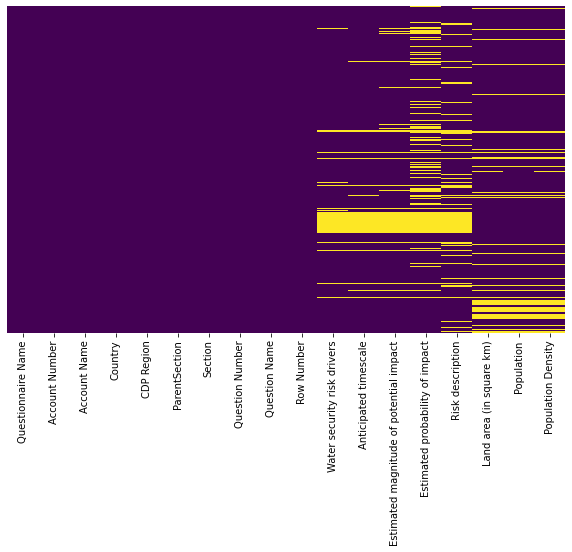

In [17]:
plt.figure(figsize = (10, 6))
sns.heatmap(concated_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
predict_data = pd.read_excel('aquastat.xls')
predict_data.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md,Unnamed: 8
0,Afghanistan,4,Total area of the country (excl. coastal water),4100,1992.0,65286.0,X,NaN,6768.0
1,Afghanistan,4,Total area of the country (excl. coastal water),4100,1997.0,65286.0,X,NaN,6768.0
2,Afghanistan,4,Total area of the country (excl. coastal water),4100,2002.0,65286.0,X,NaN,6768.0
3,Afghanistan,4,Total area of the country (excl. coastal water),4100,2007.0,65286.0,X,NaN,6768.0
4,Afghanistan,4,Total area of the country (excl. coastal water),4100,2012.0,65286.0,X,NaN,6768.0


In [23]:
predict_data[predict_data['Area'] == 'Afghanistan']

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md,Unnamed: 8
0,Afghanistan,4,Total area of the country (excl. coastal water),4100,1992.0,65286.0,X,NaN,6768.0
1,Afghanistan,4,Total area of the country (excl. coastal water),4100,1997.0,65286.0,X,NaN,6768.0
2,Afghanistan,4,Total area of the country (excl. coastal water),4100,2002.0,65286.0,X,NaN,6768.0
3,Afghanistan,4,Total area of the country (excl. coastal water),4100,2007.0,65286.0,X,NaN,6768.0
4,Afghanistan,4,Total area of the country (excl. coastal water),4100,2012.0,65286.0,X,NaN,6768.0
5,Afghanistan,4,Total area of the country (excl. coastal water),4100,2017.0,65286.0,E,NaN,0.0
6,Afghanistan,4,Total area of the country (excl. coastal water),4100,2018.0,65286.0,E,NaN,0.0
7,Afghanistan,4,Arable land area,4101,1992.0,7910.0,X,NaN,0.0
8,Afghanistan,4,Arable land area,4101,1997.0,7685.0,X,NaN,0.0
9,Afghanistan,4,Arable land area,4101,2002.0,7678.0,X,NaN,0.0


In [25]:
predict_data['Variable Name'].unique()

array(['Total area of the country (excl. coastal water)',
       'Arable land area', nan, 'accessed on&nbsp'], dtype=object)

In [44]:
df[df['Account Name'] == "Tarakan City"]

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
1470,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Drought,Short-term (by 2025),Serious,Medium-high,"forest fire, water scarcity, drought"
1471,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Increased water demand,Current,Serious,Medium-high,service not maximum
1472,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,3,Declining water quality,Current,Serious,Medium,affect to community health
1473,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,4,Inadequate or ageing water supply infrastructure,Short-term (by 2025),Serious,High,increasing NRW (non revenue water)
1474,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,5,Higher water prices,Short-term (by 2025),Serious,High,operational cost is high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,156,NaN,NaN,NaN,NaN,NaN
1626,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,157,NaN,NaN,NaN,NaN,NaN
1627,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,158,NaN,NaN,NaN,NaN,NaN
1628,Cities 2021,73750,Tarakan City,Indonesia,Southeast Asia and Oceania,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,159,NaN,NaN,NaN,NaN,NaN


In [46]:
df[df['Account Name'] == "Tarakan City"]['Risk description'].value_counts().head()

forest fire, water scarcity, drought    1
service not maximum                     1
affect to community health              1
increasing NRW (non revenue water)      1
operational cost is high                1
Name: Risk description, dtype: int64

In [32]:
df['Anticipated timescale'].value_counts().head()

Current                    596
Question not applicable    512
Medium-term (by 2050)      466
Short-term (by 2025)       365
Long-term (after 2050)     213
Name: Anticipated timescale, dtype: int64

In [58]:
len(df[df['Account Name'] == 'Tarakan City'])

160

In [137]:
# check no of cities with multiple entries
multiple_cities = np.unique([i for i in df['Account Name'] if len(df[df['Account Name'] == i]) > 1])

In [138]:
len(multiple_cities)

408

In [73]:
#there are 408 cities with multiple rows

In [76]:
# first make a dataframe with only unique cities

df_unique = pd.DataFrame(columns=df.columns)
df_unique

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description


In [78]:
unique_cities = [i for i in list(df['Account Name']) if i not in multiple_cities]

In [90]:
for i in unique_cities:
    df_unique = pd.concat([df_unique, df[df['Account Name'] == i]])

In [94]:
df_unique.head()

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...
12,Cities 2021,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
13,Cities 2021,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
14,Cities 2021,2430,"City of Burlington, VT",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
15,Cities 2021,2621,Cambridgeshire County Council,United Kingdom of Great Britain and Northern I...,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water demand,Short-term (by 2025),Extremely serious,High,increased growth without a secure water supply...


In [95]:
#check for missing and categorical values
for i in list(df_unique.columns):
    print(f'{i} {sum(df_unique[i].isnull())} nulls and {df_unique[i].nunique()} unique values ')

Questionnaire Name 0 nulls and 1 unique values 
Account Number 0 nulls and 662 unique values 
Account Name 0 nulls and 662 unique values 
Country 0 nulls and 69 unique values 
CDP Region 0 nulls and 8 unique values 
ParentSection 0 nulls and 1 unique values 
Section 0 nulls and 1 unique values 
Question Number 0 nulls and 1 unique values 
Question Name 0 nulls and 1 unique values 
Row Number 0 nulls and 2 unique values 
Water security risk drivers 38 nulls and 18 unique values 
Anticipated timescale 24 nulls and 5 unique values 
Estimated magnitude of potential impact 34 nulls and 4 unique values 
Estimated probability of impact 81 nulls and 7 unique values 
Risk description 53 nulls and 164 unique values 


<AxesSubplot:>

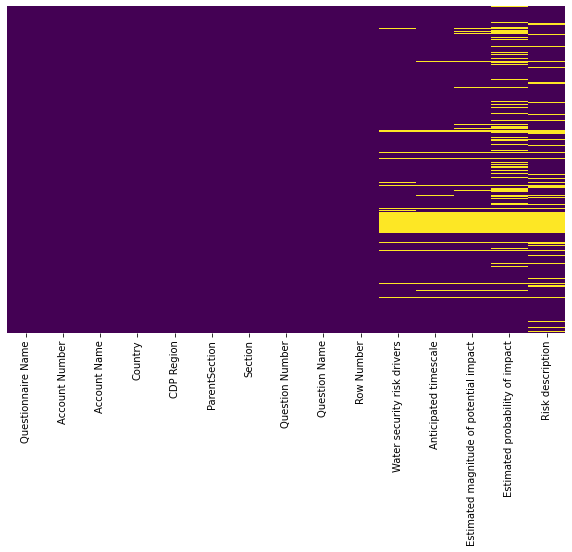

In [96]:
#original missing heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

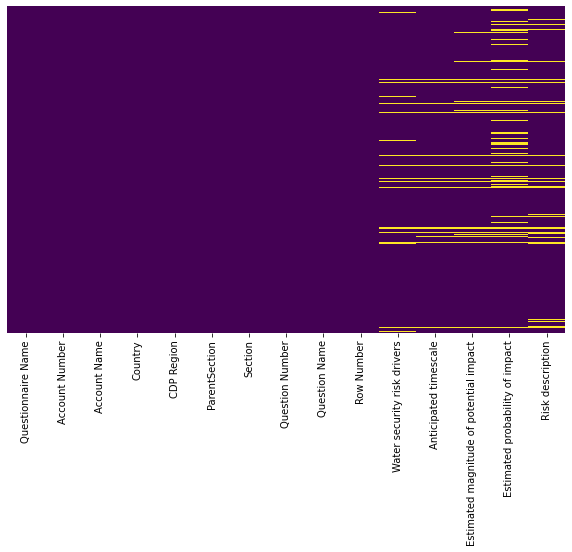

In [97]:
#unique missing heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df_unique.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [99]:
# make dictionaries for categorical variables
# first

cate_columns = ['Anticipated timescale', 'Estimated magnitude of potential impact', 'Estimated probability of impact']
for i in cate_columns:
    print(df[i].unique(), '\n')

['Short-term (by 2025)' 'Current' 'Medium-term (by 2050)'
 'Question not applicable' 'Long-term (after 2050)' nan] 

['Serious' 'Extremely serious' 'Less Serious' 'Question not applicable'
 nan] 

[nan 'High' 'Medium-high' 'Medium' 'Medium-low' 'Question not applicable'
 'Low' 'Do not know'] 



In [204]:
multi_city_df

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description


In [209]:
# now do for cities with multple entries

def multiple_cities_df(cities):
    
    #construct empty dataframe
    data_frame = pd.DataFrame(columns=list(df.columns))
    
    for i in cities:
        #we construct df for each city
        citi_data = df[df['Account Name'] == i]
        #length of data_frame for the city
        entries = len(city_data)
        
        for j in np.arange(0, entries):
            
        
    return data_frame

In [210]:
mult_cities = multiple_cities_df(multiple_cities)
mul

In [211]:
mult_cities.head()

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
1394,Cities 2021,63616,Abasan Al-Kabira Municipality,State of Palestine,Middle East,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Declining water quality,Current,Serious,Medium-high,NaN
1395,Cities 2021,63616,Abasan Al-Kabira Municipality,State of Palestine,Middle East,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Inadequate or ageing water supply infrastructure,Medium-term (by 2050),NaN,NaN,NaN
1396,Cities 2021,63616,Abasan Al-Kabira Municipality,State of Palestine,Middle East,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,3,Increased water stress,Short-term (by 2025),Serious,Medium-high,NaN
1104,Cities 2021,58485,"Abington Township, PA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Inadequate or ageing water supply infrastructure,Long-term (after 2050),Less Serious,Do not know,Unknown as this has not been formally assessed...
1105,Cities 2021,58485,"Abington Township, PA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,Do not know,The public water supplier AquaPA has increased...


In [212]:
new_mult = mult_cities.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [215]:
new_mult.info()
#check for missing and categorical values
for i in list(df_unique.columns):
    print(f'{i} {sum(new_mult[i].isnull())} nulls and {new_mult[i].nunique()} unique values ')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 1104 to 1710
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Questionnaire Name                       1016 non-null   object
 1   Account Number                           1016 non-null   object
 2   Account Name                             1016 non-null   object
 3   Country                                  1016 non-null   object
 4   CDP Region                               1016 non-null   object
 5   ParentSection                            1016 non-null   object
 6   Section                                  1016 non-null   object
 7   Question Number                          1016 non-null   object
 8   Question Name                            1016 non-null   object
 9   Row Number                               1016 non-null   object
 10  Water security risk drivers              1016 non-null   

In [216]:
mult_cities.info()
for i in list(df_unique.columns):
    print(f'{i} {sum(mult_cities[i].isnull())} nulls and {mult_cities[i].nunique()} unique values ')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 1394 to 1710
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Questionnaire Name                       1687 non-null   object
 1   Account Number                           1687 non-null   object
 2   Account Name                             1687 non-null   object
 3   Country                                  1687 non-null   object
 4   CDP Region                               1687 non-null   object
 5   ParentSection                            1687 non-null   object
 6   Section                                  1687 non-null   object
 7   Question Number                          1687 non-null   object
 8   Question Name                            1687 non-null   object
 9   Row Number                               1687 non-null   object
 10  Water security risk drivers              1513 non-null   

In [196]:
mult_cities = multiple_cities_df(multiple_cities)

IndexError: single positional indexer is out-of-bounds

In [166]:
mult_cities

In [27]:
lang = translator.translate(df['Risk description'][1], dest='en')

In [21]:
lang

In [6]:
df[df['Risk description'] == 'Question not applicable'].head()

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
12,Cities 2021,1850,Birmingham City Council,United Kingdom of Great Britain and Northern I...,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
13,Cities 2021,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
14,Cities 2021,2430,"City of Burlington, VT",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
16,Cities 2021,3203,"City of Chicago, IL",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
30,Cities 2021,8242,Helsingin kaupunki,Finland,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,0,Question not applicable,Question not applicable,Question not applicable,Question not applicable,Question not applicable
